In [19]:
import os
import requests
import base64
import time
import random 
from glob import glob
from PIL import Image

In [5]:
api_type = 'azure'
api_key = '7c2366d3d6694670940408c03d0381a9'
api_base = 'https://credcoreopenaiinstance3.openai.azure.com/'
api_version = '2024-02-01'

In [6]:
DATA_DIR = "./data/input"

In [7]:
IMAGE_PATH = os.path.join(DATA_DIR, "google-sec-1.png")

In [157]:
# IMAGE_PATH = random.choice(glob("./data/input/table_image/*/*.png"))
# Image.open(IMAGE_PATH)

In [66]:
headers = {
    "Content-Type": "application/json",
    "api-key": api_key,
}

In [158]:
# prompt = """Here are guidelines for extracting tabular content: 
# 1. Avoid extracting table as ascii, only generate table output in flat text format. 
# 2. Extract the table in human-readable format
# 3. If there are nested rows and columns make sure the extraction is simple enough to read. 
# 4. Also, make sure all the data from the image is considered because the generated text will be used for post-processing.
# 5. Ensure all information is retained in the generated text format"""

In [76]:
prompt = """"Please extract the financial tabular data from the provided image and convert it into plain English text following the standardized format below:
If no table found return NONE

Title: Begin with the title of the table or document.

Headers and Units:

List all column headers along with their units if applicable.
Example: 'The table includes the following columns: Date, Revenue (in USD), Expenses (in USD), Net Profit (in USD).'
Data Entries:

For each row, present the data in a consistent manner.
Use the format: 'On [Date], the revenue was [Revenue], expenses were [Expenses], resulting in a net profit of [Net Profit].'

If the table includes summary rows (like totals or averages), present them at the end.
Example: 'The total revenue for the period is [Total Revenue], with total expenses of [Total Expenses], resulting in a total net profit of [Total Net Profit].'
Consistency:

Use the same terms and structure throughout the text.
Ensure that numerical values are accurately transcribed, including decimal points and commas where appropriate.
Ensure all columns are captured in the text.
Ensure cell location is also included
Multiple Tables:

If there are multiple tables, separate them clearly using the above format for each.
Example:

Title: Quarterly Financial Report Q1 2023

Headers and Units: The table includes the following columns: Month, Revenue (in USD), Expenses (in USD), Net Profit (in USD).

Data Entries:

In January 2023(cell:A1), the revenue was $100,000(cell:A2), expenses were $70,000(cell:A3), resulting in a net profit of $30,000(cell:A4).
In February 2023(cell:B1), the revenue was $120,000(cell:B2), expenses were $80,000(cell:B3), resulting in a net profit of $40,000(cell:B4).
In March 2023(cell:C1), the revenue was $110,000(cell:C2), expenses were $75,000(cell:C3), resulting in a net profit of $35,000(cell:C4).
Summary:

The total revenue for Q1 2023 is $330,000, with total expenses of $225,000, resulting in a total net profit of $105,000."""

In [132]:
# Payload for the request
def table_to_text(image_path, prompt, llm='gpt4o'):
    encoded_image = base64.b64encode(open(image_path, 'rb').read()).decode('ascii')
    if llm == 'gpt4o':
        payload = {
          "messages": [
            {
              "role": "system",
              "content": [
                {
                  "type": "text",
                  "text": "You are an assitant expert at processing document image with table and generating a flat text file"
                }
              ]
            }, 
            {
                "role": "user",
              "content": [
                {
                  "type": "image",
                  "image": encoded_image
                },
                  {
                      "type": "text", 
                      "text": prompt
                  }
              ]
            }
          ],
          "temperature": 0.8,
          "top_p": 0.95,
          "max_tokens": 4096
        }

        ENDPOINT = "https://credcoreopenaiinstance3.openai.azure.com/openai/deployments/gpt4o/chat/completions?api-version=2024-02-15-preview"

        # Send request
        try:
            response = requests.post(ENDPOINT, headers=headers, json=payload)
            response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
        except requests.RequestException as e:
            raise SystemExit(f"Failed to make the request. Error: {e}")
        return response

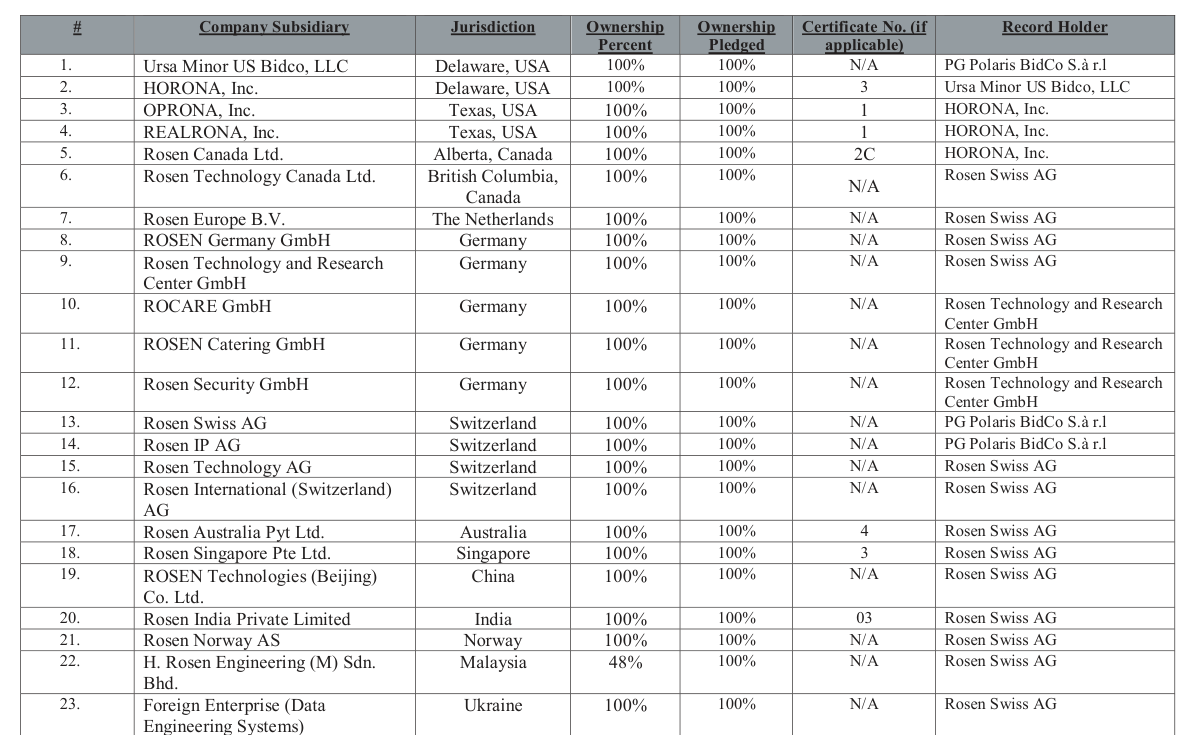

In [154]:
image_path = random.choice(glob("./data/input/table_image/*/*.png"))
Image.open(image_path )

In [155]:
table_to_text(image_path, prompt)
result = response.json()['choices'][0]['message']['content']

In [156]:
print(result)

Title: Company Subsidiary Ownership Details

Headers and Units: The table includes the following columns: #, Company Subsidiary, Jurisdiction, Ownership Percent, Ownership Pledged, Certificate No. (if applicable), Record Holder.

Data Entries:

1. Entry 24(cell:A1):
   - Company Subsidiary: Rosen Inspection Asia Pacific Sdn. Bhd.(cell:B1)
   - Jurisdiction: Malaysia(cell:C1)
   - Ownership Percent: 100%(cell:D1)
   - Ownership Pledged: 100%(cell:E1)
   - Certificate No. (if applicable): N/A(cell:F1)
   - Record Holder: Rosen Swiss AG(cell:G1)

2. Entry 25(cell:A2):
   - Company Subsidiary: ROSEN(UK) Ltd.(cell:B2)
   - Jurisdiction: United Kingdom(cell:C2)
   - Ownership Percent: 100%(cell:D2)
   - Ownership Pledged: 100%(cell:E2)
   - Certificate No. (if applicable): 32(cell:F2)
   - Record Holder: Rosen Swiss AG(cell:G2)

3. Entry 26(cell:A3):
   - Company Subsidiary: Rosenbra Engenharia Brasil Ltds.(cell:B3)
   - Jurisdiction: Brasil(cell:C3)
   - Ownership Percent: 80%(cell:D3)
   -

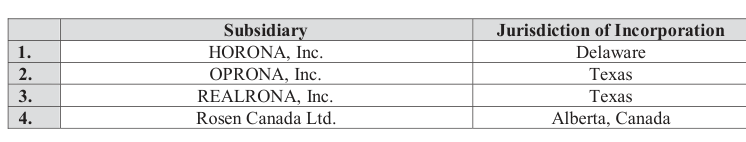

In [136]:
image_path = random.choice(glob("./data/input/table_image/*/*.png"))
img = Image.open(image_path )
img 

In [137]:
response = table_to_text(image_path, prompt)
result = response.json()['choices'][0]['message']['content']

In [138]:
print(result)

Title: Subsidiary Jurisdiction of Incorporation

Headers and Units: The table includes the following columns: Subsidiary, Jurisdiction of Incorporation.

Data Entries:

In the first row(cell:A1,B1), the subsidiary is HORONA, Inc. and the jurisdiction of incorporation is Delaware.
In the second row(cell:A2,B2), the subsidiary is OPRONA, Inc. and the jurisdiction of incorporation is Texas.
In the third row(cell:A3,B3), the subsidiary is REALRONA, Inc. and the jurisdiction of incorporation is Texas.
In the fourth row(cell:A4,B4), the subsidiary is Rosen Canada Ltd. and the jurisdiction of incorporation is Alberta, Canada.


In [139]:
os.remove(image_path)

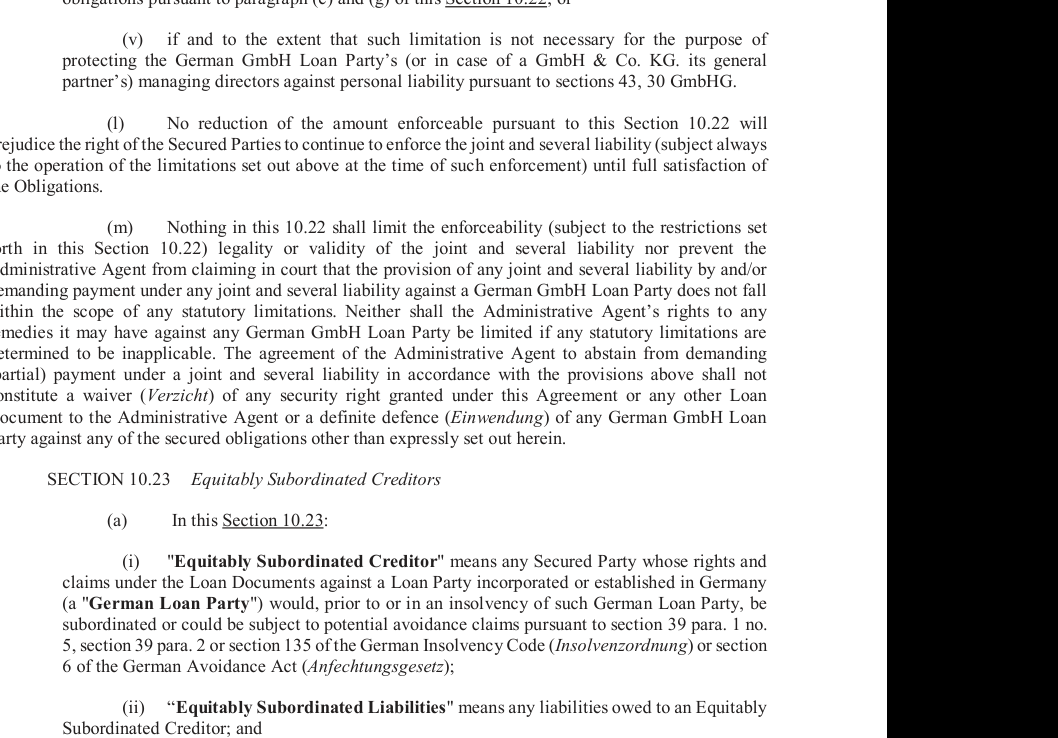

In [140]:
image_path = random.choice(glob("./data/input/table_image/*/*.png"))
img = Image.open(image_path )
img 

In [141]:
response = table_to_text(image_path, prompt)
result = response.json()['choices'][0]['message']['content']

In [142]:
print(result)

NONE


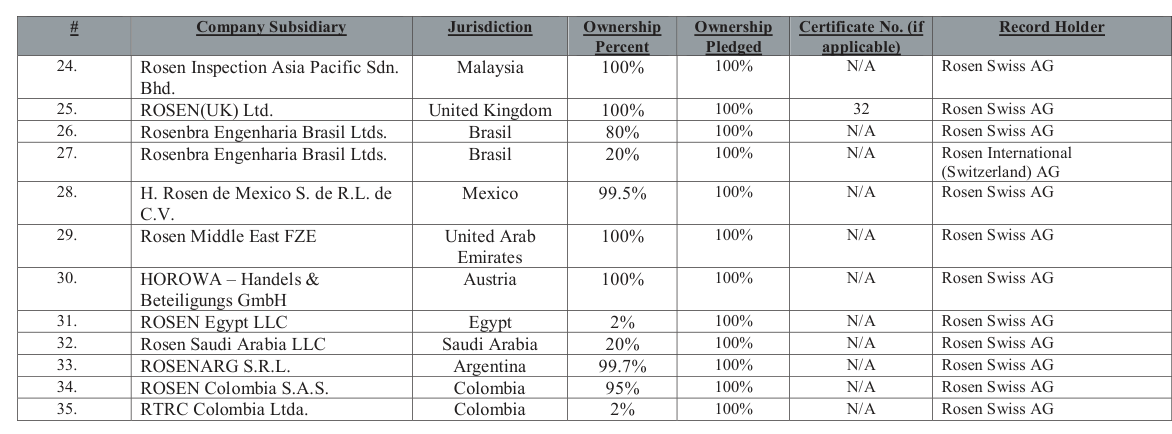

In [148]:
image_path = random.choice(glob("./data/input/table_image/*/*.png"))
img = Image.open(image_path )
img 

In [149]:
response = table_to_text(image_path, prompt)
result = response.json()['choices'][0]['message']['content']

In [150]:
print(result)

Title: Company Subsidiary Ownership Details

Headers and Units: The table includes the following columns: #, Company Subsidiary, Jurisdiction, Ownership Percent, Ownership Pledged, Certificate No. (if applicable), Record Holder.

Data Entries:

1. Entry 24(cell:A1):
   - Company Subsidiary: Rosen Inspection Asia Pacific Sdn. Bhd.(cell:B1)
   - Jurisdiction: Malaysia(cell:C1)
   - Ownership Percent: 100%(cell:D1)
   - Ownership Pledged: 100%(cell:E1)
   - Certificate No. (if applicable): N/A(cell:F1)
   - Record Holder: Rosen Swiss AG(cell:G1)

2. Entry 25(cell:A2):
   - Company Subsidiary: ROSEN(UK) Ltd.(cell:B2)
   - Jurisdiction: United Kingdom(cell:C2)
   - Ownership Percent: 100%(cell:D2)
   - Ownership Pledged: 100%(cell:E2)
   - Certificate No. (if applicable): 32(cell:F2)
   - Record Holder: Rosen Swiss AG(cell:G2)

3. Entry 26(cell:A3):
   - Company Subsidiary: Rosenbra Engenharia Brasil Ltds.(cell:B3)
   - Jurisdiction: Brasil(cell:C3)
   - Ownership Percent: 80%(cell:D3)
   -

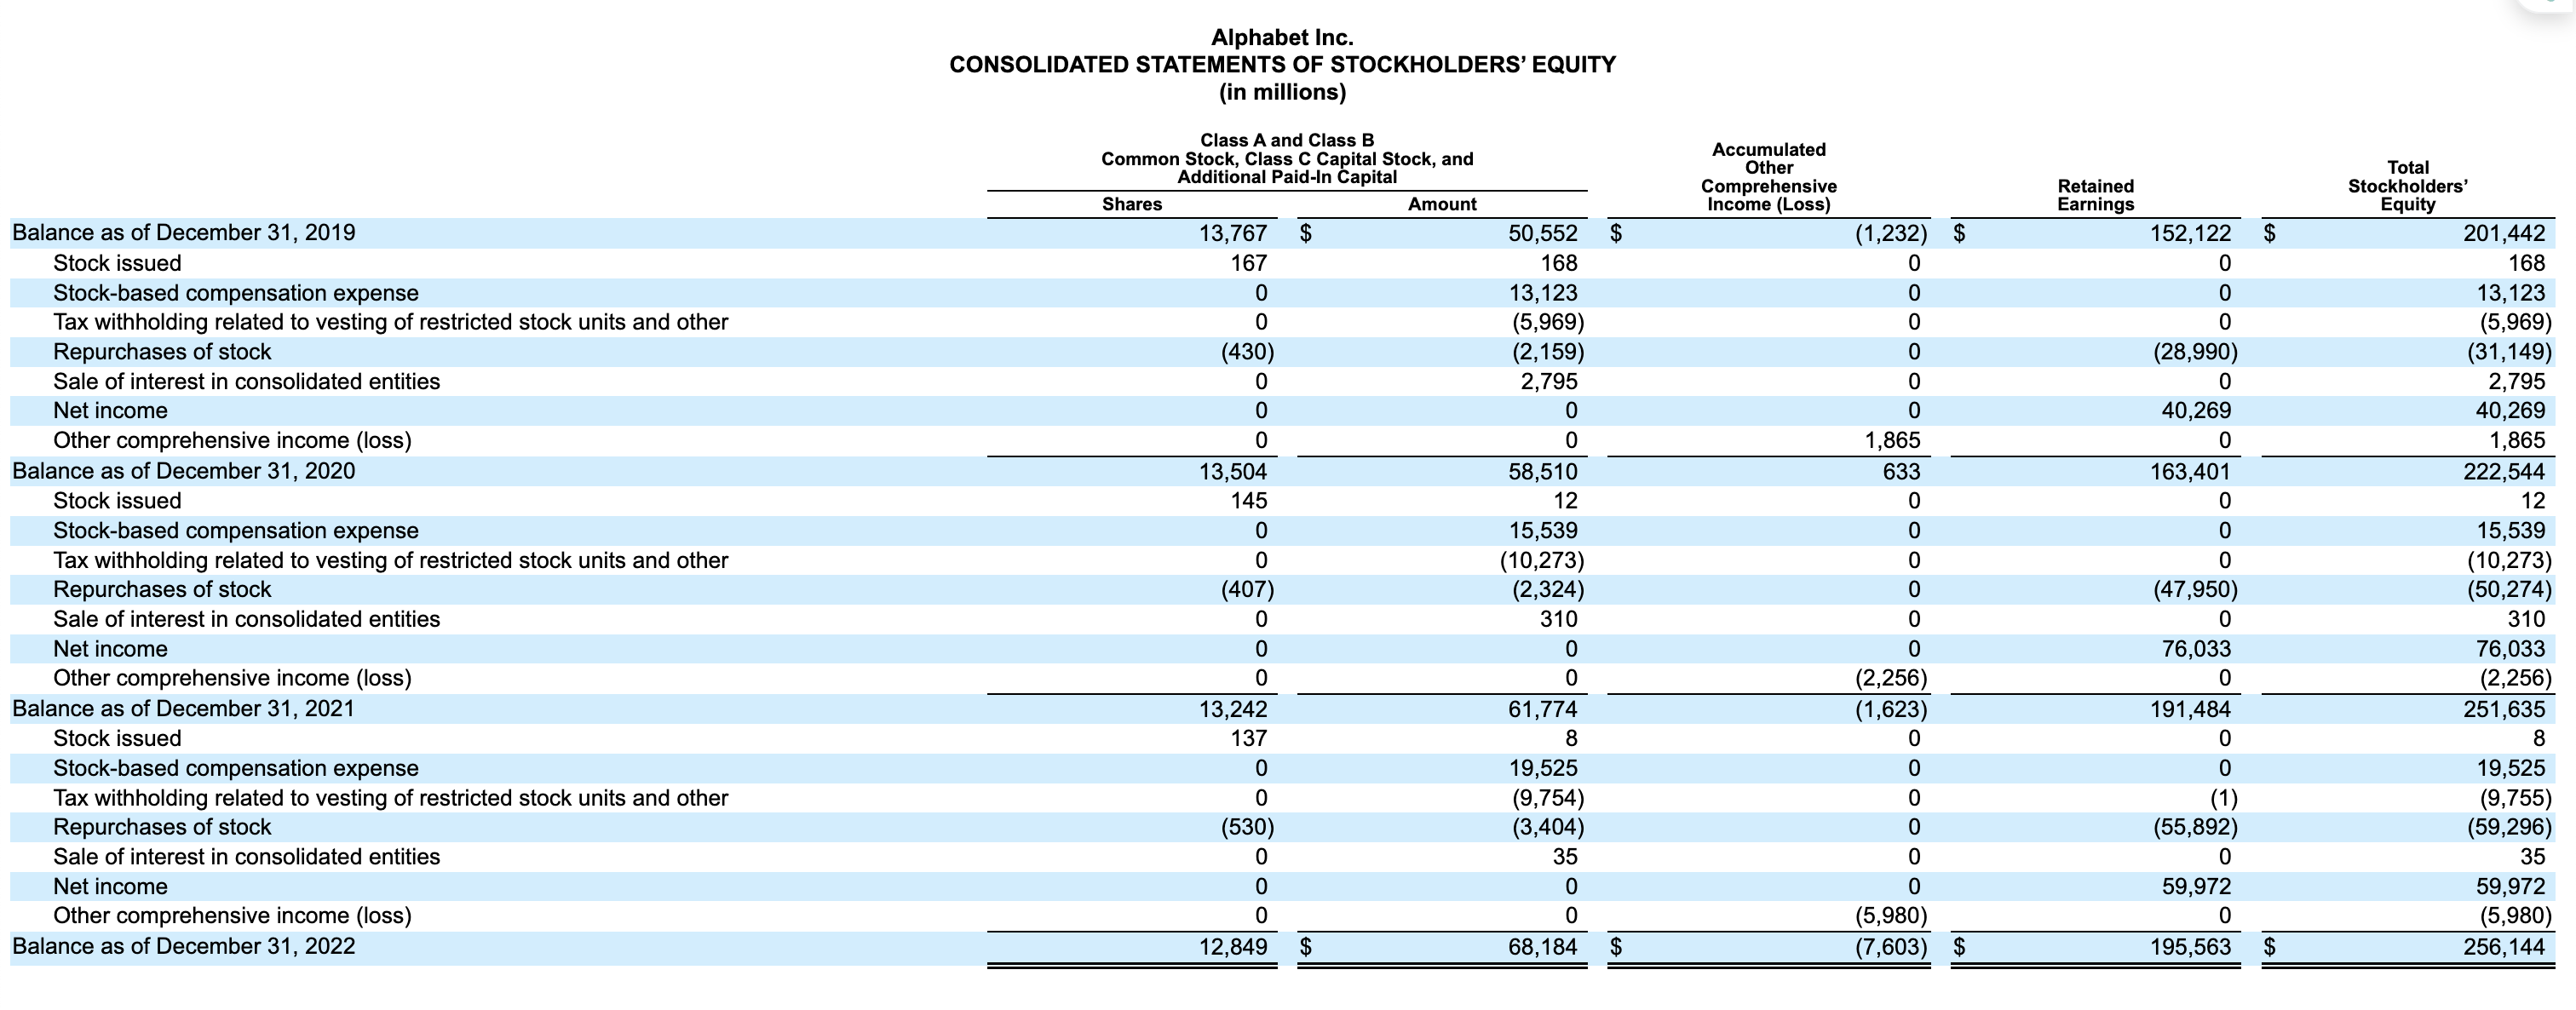

In [161]:
image_path = "./data/input/google-sec-1.png"
img = Image.open(image_path )
img 

In [162]:
response = table_to_text(image_path, prompt)
result = response.json()['choices'][0]['message']['content']

In [163]:
print(result)

Title: Alphabet Inc. CONSOLIDATED STATEMENTS OF STOCKHOLDERS’ EQUITY (in millions)

Headers and Units: The table includes the following columns: 
- Date
- Shares
- Common Stock, Class A and Class B, Class C Capital Stock, and Additional Paid-In Capital (Amount in USD)
- Accumulated Other Comprehensive Income (Loss) (in USD)
- Retained Earnings (in USD)
- Total Stockholders’ Equity (in USD)

Data Entries:

On December 31, 2019 (cell:A1), the balance was 13,767 shares (cell:B1), $50,552 for common stock and additional paid-in capital (cell:C1), $(1,232) for accumulated other comprehensive income (loss) (cell:D1), $152,122 for retained earnings (cell:E1), resulting in $201,442 total stockholders’ equity (cell:F1).

Stock issued in 2019 (cell:A2), resulted in 167 shares (cell:B2), $168 for common stock and additional paid-in capital (cell:C2), no change in accumulated other comprehensive income (loss) (cell:D2), no change in retained earnings (cell:E2), resulting in $168 total stockholders